In [1]:
import numpy as np 
import pandas as pd
from scipy.interpolate import UnivariateSpline 
import matplotlib.pyplot as plt
plt.style.use('sensitivity.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



In [4]:
sens_rn222_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_rn222.csv',\
                                        delimiter=',',\
                                       skip_header=1)
sens_xe137_scaling_d024 = np.genfromtxt('Data/d024_sensitivity_vs_xe137.csv',\
                                       delimiter=',',\
                                       skip_header=1)
dp_gamma_scaling_d024 = np.genfromtxt('Data/d024_dp_vs_gamma.csv',\
                                       delimiter=',',\
                                       skip_header=1)



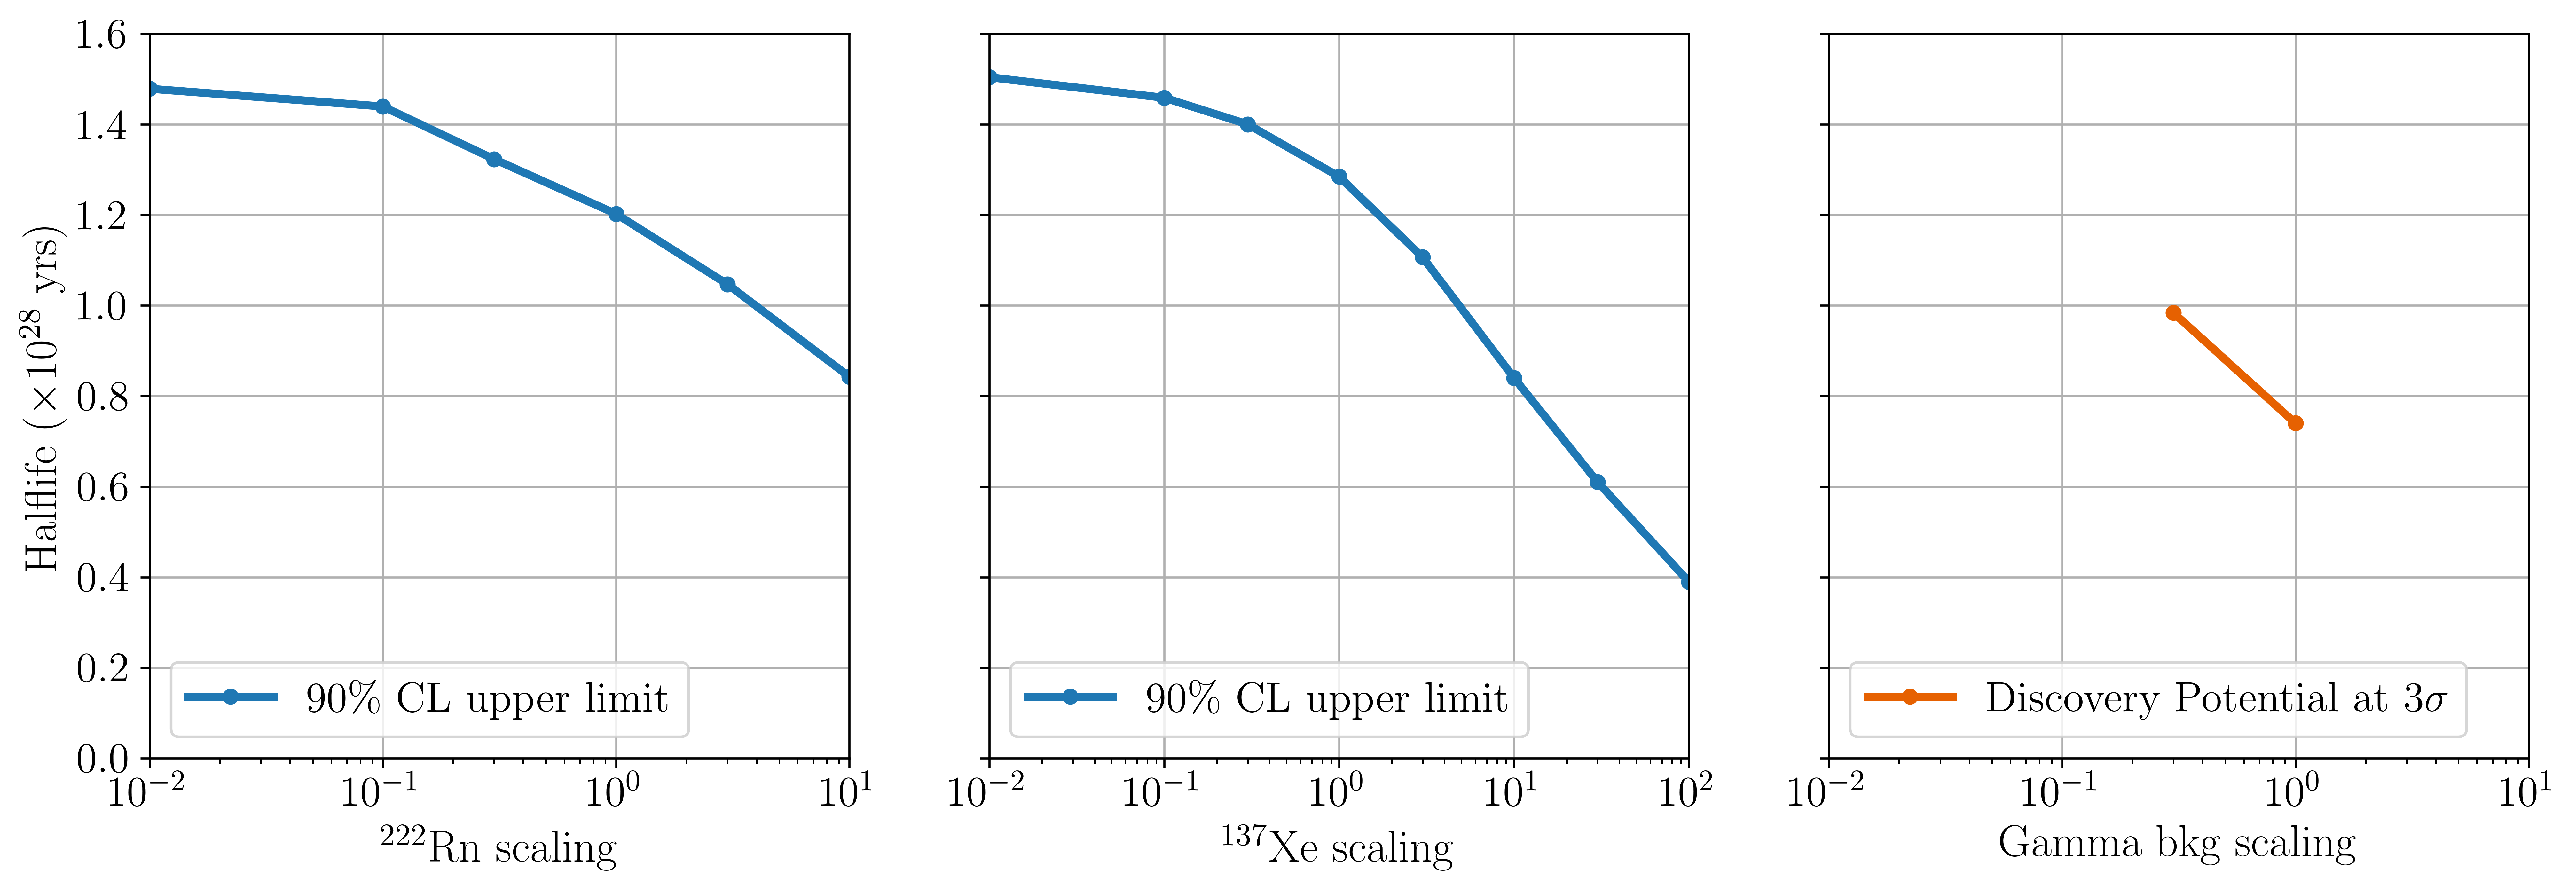

In [9]:
plt.rcParams['figure.figsize'] = (16,5)


fig, ax = plt.subplots(ncols=3,nrows=1,sharey=True)

# First panel: Rn222 scaling
ax[0].plot(sens_rn222_scaling_d024[:,0],sens_rn222_scaling_d024[:,1],\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[0].set_xscale('log')
ax[0].set_xlabel(r'$^{222}$Rn scaling')
ax[0].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[0].set_ylim(0.,1.6)
ax[0].legend(loc='lower left')
ax[0].set_xlim(0.01,10.)
ax[0].grid()


# Second panel: Xe137 scaling
ax[1].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color=colors[0])
ax[1].set_xscale('log')
ax[1].set_xlabel('$^{137}$Xe scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[1].set_ylim(0.,1.6)
ax[1].set_xlim(0.01,100.)
ax[1].legend(loc='lower left')
ax[1].grid()


# Third panel: gamma scaling
# ax[2].plot(sens_xe137_scaling_d024[:,0],sens_xe137_scaling_d024[:,1]/1.e28,\
#            '-o',linewidth=3,markersize=5,label='90\% CL upper limit',color='g')

ax[2].plot(dp_gamma_scaling_d024[:,0],dp_gamma_scaling_d024[:,1]/1.e28,\
           '-o',linewidth=3,markersize=5,label='Discovery Potential at $3\sigma$',color=colors[1])
ax[2].set_xscale('log')
ax[2].set_xlabel('Gamma bkg scaling')
#ax[1].set_ylabel(r'Halflife ($\times 10^{28}$ yrs)')
ax[2].set_ylim(0.,1.6)
ax[2].set_xlim(0.01,10.)
ax[2].legend(loc='lower left')
ax[2].grid()

plt.savefig('sensitivity_vs_background_scaling.png',dpi=300,bbox_inches='tight')